In [1]:
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,
    GradientBoostingRegressor, ExtraTreesClassifier, AdaBoostClassifier,
    AdaBoostRegressor,
)
from sklearn.linear_model import (
    LinearRegression, LogisticRegression,
    SGDClassifier, SGDRegressor,Ridge,
    RidgeClassifier, Lasso, ElasticNet,
    PassiveAggressiveRegressor,
)
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB,
    CategoricalNB, ComplementNB,
)

from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, LabelEncoder,
)
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error, mean_absolute_error,
    roc_curve, roc_auc_score, precision_recall_curve,
    auc,
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve,
    GridSearchCV, RandomizedSearchCV,
)
from sklearn.datasets import (
    fetch_openml, make_classification, make_regression,
)

from mlxtend.plotting import plot_decision_regions
from yellowbrick.classifier import DiscriminationThreshold, ROCAUC
from yellowbrick.model_selection import LearningCurve

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import warnings; warnings.warn = lambda *k, **kw: ...

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

## Методичка

In [4]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)
X.shape, Y.shape

((1000, 5), (1000,))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 5), (800,), (200, 5), (200,))

In [6]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [7]:
%%time
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

CPU times: user 3min 52s, sys: 1min 51s, total: 5min 43s
Wall time: 52.1 s


In [8]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
0,Nearest_Neighbors,0.8700
7,Extra_Trees,0.8700
9,Neural_Net,0.8650
3,RBF_SVM,0.8600
4,Gaussian_Process,0.8550
11,Naive_Bayes,0.8500
6,Decision_Tree,0.8450
12,QDA,0.8450
1,Linear_SVM,0.8400
5,Gradient_Boosting,0.8400


In [9]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.870000
7,Extra_Trees,0.870000
9,Neural_Net,0.865000
3,RBF_SVM,0.860000
4,Gaussian_Process,0.855000
11,Naive_Bayes,0.850000
6,Decision_Tree,0.845000
12,QDA,0.845000
1,Linear_SVM,0.840000
5,Gradient_Boosting,0.840000


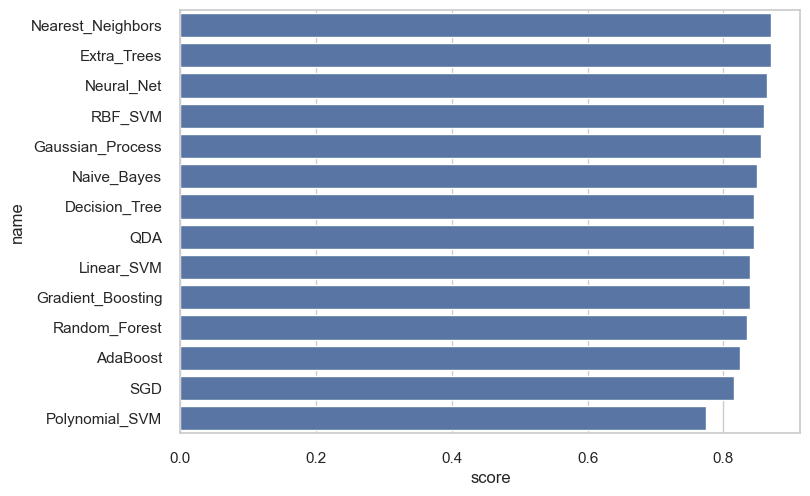

In [10]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.5%20hyperparameters/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000


In [12]:
X = df.drop('sales',axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
base_elastic_model = ElasticNet()
param_grid = {
    'alpha':[0.1, 1, 5, 10, 50, 100],
    'l1_ratio':[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
}

In [14]:
grid_model = GridSearchCV(
    estimator=base_elastic_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    verbose=1,
    cv=5,
)

In [15]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
grid_model.best_estimator_.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 1,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [17]:
y_pred = grid_model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.3873426420874733

## Задания для самостоятельного выполнения

#### 1. При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.

In [18]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)
X.shape, Y.shape

((1000, 5), (1000,))

In [19]:
X_train, x, Y_train, y = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(x, y, test_size=0.5)
Y_train.shape, Y_test.shape, Y_val.shape

((600,), (200,), (200,))

In [20]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [21]:
%%time
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_val, Y_val)
    scores.append(score)

CPU times: user 2min 35s, sys: 2min 16s, total: 4min 51s
Wall time: 40.5 s


In [22]:
df = pd.DataFrame()
df['name'], df['score'] = names, scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
4,Gaussian_Process,0.8700
9,Neural_Net,0.8700
12,QDA,0.8650
8,Random_Forest,0.8600
11,Naive_Bayes,0.8550
0,Nearest_Neighbors,0.8500
1,Linear_SVM,0.8500
7,Extra_Trees,0.8300
5,Gradient_Boosting,0.8250
3,RBF_SVM,0.8150


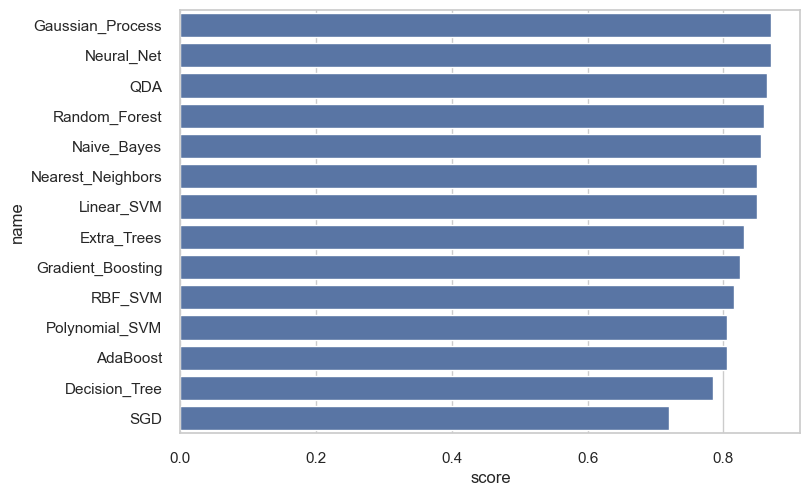

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [24]:
ix = np.argmax(scores)
best_clf_name, best_clf = names[ix], classifiers[ix]
best_clf_name, best_clf.score(X_test, Y_test)

('Gaussian_Process', 0.89)

#### 2. Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.5%20hyperparameters/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000


In [26]:
X, y = df.drop('sales', axis=1), df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
base_elastic_model = ElasticNet()
params = {
    'alpha':[0.1, 1, 5, 10, 50, 100],
    'l1_ratio':[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
}

In [28]:
model = base_elastic_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

8.79293973183176

In [29]:
random_model = RandomizedSearchCV(
    estimator=base_elastic_model,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    verbose=1,
    cv=5,
)

In [30]:
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [0.1, 1, 5, 10, 50, 100],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1]},
                   scoring='neg_mean_squared_error', verbose=1)

In [31]:
grid_model.best_estimator_.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 1,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [32]:
model = grid_model.best_estimator_.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.7261568911227716

#### 3. Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели. Сравните, насколько лучше получилась модель.

In [33]:
names = [
    "Linear Regression", "Ridge Regression", "Lasso Regression",
    "ElasticNet", "SDG", "Passive Aggressive Regressor", "MLP", "SVR",
    "Gradient Boosting", "Ada Boost",
]

regression_models = [
    LinearRegression(), Ridge(), Lasso(), ElasticNet(),
    SGDRegressor(), PassiveAggressiveRegressor(),
    MLPRegressor(), SVR(), GradientBoostingRegressor(),
    AdaBoostRegressor()
]

In [34]:
%%time
scores = []
for name, clf in zip(names, regression_models):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    scores.append(score)

CPU times: user 2.15 s, sys: 397 ms, total: 2.55 s
Wall time: 546 ms


In [35]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], inplace=True)
df

,name,score
8,Gradient Boosting,0.4327
9,Ada Boost,0.7320
4,SDG,2.5769
0,Linear Regression,2.5784
1,Ridge Regression,2.6103
7,SVR,2.9927
2,Lasso Regression,5.7893
3,ElasticNet,8.7929
5,Passive Aggressive Regressor,12.6708
6,MLP,42.8756


In [36]:
model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.425288116661521

In [37]:
params_grid = {
    'n_estimators': [100, 200, 300, 400],  # Количество деревьев в ансамбле
    'learning_rate': [0.05, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2, 4, 7],  # Минимальное число образцов, необходимых для разделения узла
    'min_samples_leaf': [1, 2],  # Минимальное количество образцов в листовом узле
    'alpha': [0.5, 0.7, 0.9],  # Константа для функции потерь 'huber' и 'quantile'
}

In [38]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=params_grid,
    scoring=mean_squared_error,
    verbose=1,
    cv=5,
)

In [39]:
%%time
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
CPU times: user 2min 43s, sys: 375 ms, total: 2min 43s
Wall time: 2min 45s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5, 0.7, 0.9],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring=<function mean_squared_error at 0x14cbcfe20>, verbose=1)

In [40]:
best_params = grid_model.best_estimator_.get_params()
best_params

{'alpha': 0.5,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
model_grid = GradientBoostingRegressor(**best_params).fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
mean_squared_error(y_test, y_pred)

0.40268676781762913

In [42]:
params_random = {
    'n_estimators': [100, 200, 300, 400],  # Количество деревьев в ансамбле
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Скорость обучения
    'max_depth': [3, 4, 5, 6, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2, 4, 6, 8],  # Минимальное число образцов, необходимых для разделения узла
    'min_samples_leaf': [1, 2, 3, 4],  # Минимальное количество образцов в листовом узле
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Доля обучающих примеров, используемых для обучения каждого дерева
    'alpha': [0.5, 0.7, 0.9],  # Константа для функции потерь
}

In [43]:
random_model = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_random,
    scoring=mean_squared_error,
    n_iter=500,
    verbose=1,
    cv=5,
)

In [44]:
%%time
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
CPU times: user 2min 4s, sys: 120 ms, total: 2min 4s
Wall time: 2min 5s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=500,
                   param_distributions={'alpha': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring=<function mean_squared_error at 0x14cbcfe20>,
                   verbose=1)

In [45]:
best_params = random_model.best_estimator_.get_params()
best_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.6,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [46]:
model_grid = GradientBoostingRegressor(**best_params).fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
mean_squared_error(y_test, y_pred)

0.26870709229336137

#### 4. Оптимизируйте гиперпараметры любой модели с помощью библиотеки **Hyperopt**.

In [47]:
from hyperopt import fmin, tpe, Trials
from hyperopt import hp, STATUS_OK

In [48]:
space = {
    'n_estimators': hp.choice('n_estimators', range(100, 501, 100)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),
}

In [49]:
def objective(params):
    model = GradientBoostingRegressor(**params)
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

In [50]:
best = fmin(
    fn=objective,
    space=space,
    max_evals=100,
)

TPE is being used as the default algorithm.


100%|██████████| 100/100 [00:32<00:00,  3.06trial/s, best loss: 0.5527996862697879]


In [51]:
print(best)

{'learning_rate': 0.12104705302390695, 'max_depth': 1, 'min_samples_split': 8, 'n_estimators': 4}


In [52]:
model = GradientBoostingRegressor(**best).fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

22.263933581537515

#### 5. Оптимизируйте гиперпараметры любой модели с помощью библиотеки **Optuna**.

In [53]:
import optuna

In [ ]:
def objective(trial):
    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        learning_rate=trial.suggest_uniform('learning_rate', 0.01, 0.3),
        max_depth=trial.suggest_int('max_depth', 3, 9),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 4),
    ).fit(X_train, y_train)

    mse = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

In [55]:
best_params = study.best_trial.params
best_params

{'n_estimators': 317,
 'learning_rate': 0.026181975324486535,
 'max_depth': 4,
 'min_samples_split': 4,
 'min_samples_leaf': 3}

In [56]:
study.best_value

0.5835317932011623

In [57]:
model_grid = GradientBoostingRegressor(**best_params).fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
mean_squared_error(y_test, y_pred)

0.29818407775571626